# Longitudinal data

In this *Python* notebook we will get introduced to examples of longitudinal data, i.e. data with a **time component**:

## Read data

Data from:
- [Spatiotemporally explicit model averaging for forecasting of Alaskan groundfish catch](https://onlinelibrary.wiley.com/doi/10.1002/ece3.4488)
- [(data repo [here](https://zenodo.org/record/4987796#.ZHcLL9JBxhE))]

It's data on fish catch (multiple fish species) over time in different regions of Alaska.

In [1]:
import numpy as np
import pandas as pd

In [2]:
url= "https://zenodo.org/records/4987796/files/stema_data.csv"
fish = pd.read_csv(url)

In [3]:
## data size (tabular)
fish.shape

(6716, 14)

In [4]:
fish

,Unnamed: 0,Station,Year,Area,Species,Latitude,Longitude,CPUE,SST_cvW,SST_cvW5,SST_cvW4,SST_cvW3,SST_cvW2,SST_cvW1
0,2092,62,1990,Western Gulf of Alaska,Pacific cod,52.663,-168.988,1.212,0.222324,0.252917,0.209706,0.187889,0.195080,0.296625
1,2093,62,1991,Western Gulf of Alaska,Pacific cod,52.663,-168.988,0.645,0.236036,0.209706,0.187889,0.195080,0.296625,0.222324
2,2094,62,1992,Western Gulf of Alaska,Pacific cod,52.663,-168.988,2.661,0.252917,0.187889,0.195080,0.296625,0.222324,0.236036
3,2095,62,1993,Western Gulf of Alaska,Pacific cod,52.663,-168.988,1.947,0.209706,0.195080,0.296625,0.222324,0.236036,0.252917
4,2096,62,1994,Western Gulf of Alaska,Pacific cod,52.663,-168.988,1.767,0.187889,0.296625,0.222324,0.236036,0.252917,0.209706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,39103,149,2008,East Yakutat/Southeast,Sablefish,54.598,-133.023,6.827,0.164408,0.143692,0.144263,0.147234,0.133766,0.120992
6712,39113,149,2009,East Yakutat/Southeast,Sablefish,54.598,-133.023,7.116,0.209535,0.144263,0.147234,0.133766,0.120992,0.164408
6713,39123,149,2010,East Yakutat/Southeast,Sablefish,54.598,-133.023,10.756,0.110823,0.147234,0.133766,0.120992,0.164408,0.209535
6714,39133,149,2011,East Yakutat/Southeast,Sablefish,54.598,-133.023,9.177,0.173239,0.133766,0.120992,0.164408,0.209535,0.110823


-   **CPUE**: target variable, "catch per unit effort"
-   **SST**: sea surface temperature
-   **CV**: actually, the coefficient of variation for SST is used $\rightarrow$ the coefficient of variation is an improved measure of seasonal SST over the mean, because it standardizes scale and allows us to consider the changes in variation of SST with the changes in mean over (Hannah Correia, 2018 - Ecology and Evolution)
-   **SSTcvW1-5**: CPUE is influenced by survival in the first year of life. Water temperature affects survival, and juvenile fish are more susceptible to environmental changes than adults. Therefore, CPUE for a given year is likely linked to the winter SST at the juvenile state. Since this survey targets waters during the summer and the four species covered reach maturity at 5--8 years, SST was lagged for years one through five to allow us to capture the effect of SST on the juvenile stages. All five lagged SST measures were included for modeling.

### Data preprocessing

In [5]:
fish.columns

Index(['Unnamed: 0', 'Station', 'Year', 'Area', 'Species', 'Latitude',
       'Longitude', 'CPUE', 'SST_cvW', 'SST_cvW5', 'SST_cvW4', 'SST_cvW3',
       'SST_cvW2', 'SST_cvW1'],
      dtype='object')

In [6]:
fish = fish.drop(['Unnamed: 0', 'Latitude', 'Longitude'], axis=1)

In [7]:
fish

,Station,Year,Area,Species,CPUE,SST_cvW,SST_cvW5,SST_cvW4,SST_cvW3,SST_cvW2,SST_cvW1
0,62,1990,Western Gulf of Alaska,Pacific cod,1.212,0.222324,0.252917,0.209706,0.187889,0.195080,0.296625
1,62,1991,Western Gulf of Alaska,Pacific cod,0.645,0.236036,0.209706,0.187889,0.195080,0.296625,0.222324
2,62,1992,Western Gulf of Alaska,Pacific cod,2.661,0.252917,0.187889,0.195080,0.296625,0.222324,0.236036
3,62,1993,Western Gulf of Alaska,Pacific cod,1.947,0.209706,0.195080,0.296625,0.222324,0.236036,0.252917
4,62,1994,Western Gulf of Alaska,Pacific cod,1.767,0.187889,0.296625,0.222324,0.236036,0.252917,0.209706
...,...,...,...,...,...,...,...,...,...,...,...
6711,149,2008,East Yakutat/Southeast,Sablefish,6.827,0.164408,0.143692,0.144263,0.147234,0.133766,0.120992
6712,149,2009,East Yakutat/Southeast,Sablefish,7.116,0.209535,0.144263,0.147234,0.133766,0.120992,0.164408
6713,149,2010,East Yakutat/Southeast,Sablefish,10.756,0.110823,0.147234,0.133766,0.120992,0.164408,0.209535
6714,149,2011,East Yakutat/Southeast,Sablefish,9.177,0.173239,0.133766,0.120992,0.164408,0.209535,0.110823


Note: in the subset below, **CPUE values are identical**

We see that, in order to accommodate variation in SST among stations, the CPUE value has been replicated multiple times. This would defeat our purpose of analysing data by group (fish species) over space and time: with only one value per group, a statistical analysis is a bit hard to be performed (no variation). Therefore, to the original CPUE values we add some random noise proportional to the average (by species, area, year):


In [8]:
fish.loc[(fish['Species'] == "Pacific cod") & (fish['Area'] == "West Yakutat") & (fish['Year'] == 1990)]

,Station,Year,Area,Species,CPUE,SST_cvW,SST_cvW5,SST_cvW4,SST_cvW3,SST_cvW2,SST_cvW1
621,89,1990,West Yakutat,Pacific cod,0.257,0.184981,0.170131,0.187907,0.204168,0.181633,0.232143
644,90,1990,West Yakutat,Pacific cod,0.257,0.182921,0.150192,0.179461,0.186885,0.185428,0.228893
667,91,1990,West Yakutat,Pacific cod,0.257,0.180274,0.160873,0.171338,0.199175,0.201185,0.234303
690,92,1990,West Yakutat,Pacific cod,0.257,0.146539,0.122142,0.158705,0.193011,0.196952,0.216233
713,93,1990,West Yakutat,Pacific cod,0.257,0.159055,0.119703,0.150706,0.194416,0.181282,0.210157
736,94,1990,West Yakutat,Pacific cod,0.257,0.177652,0.131320,0.159346,0.193603,0.164746,0.199447
759,95,1990,West Yakutat,Pacific cod,0.257,0.177032,0.148819,0.169562,0.196527,0.174598,0.198033
782,96,1990,West Yakutat,Pacific cod,0.257,0.194973,0.134543,0.158762,0.204315,0.178914,0.210140
1449,136,1990,West Yakutat,Pacific cod,0.257,0.146539,0.122142,0.158705,0.193011,0.196952,0.216233
1472,137,1990,West Yakutat,Pacific cod,0.257,0.145730,0.117977,0.155010,0.192141,0.197596,0.211240


In [9]:
## mutate variable
# Assuming fish is a pandas DataFrame
fish['avg'] = fish.groupby(['Species', 'Area', 'Year'])['CPUE'].transform('mean')
fish['std'] = 0.1 * fish['avg']

In [10]:
fish['noise'] = np.random.normal(loc=0, scale=fish['std'])
fish['CPUE'] = fish['CPUE'] + fish['noise']

In [11]:
fish.loc[(fish['Species'] == "Pacific cod") & (fish['Area'] == "West Yakutat") & (fish['Year'] == 1990)]

,Station,Year,Area,Species,CPUE,SST_cvW,SST_cvW5,SST_cvW4,SST_cvW3,SST_cvW2,SST_cvW1,avg,std,noise
621,89,1990,West Yakutat,Pacific cod,0.233627,0.184981,0.170131,0.187907,0.204168,0.181633,0.232143,0.257,0.0257,-0.023373
644,90,1990,West Yakutat,Pacific cod,0.240742,0.182921,0.150192,0.179461,0.186885,0.185428,0.228893,0.257,0.0257,-0.016258
667,91,1990,West Yakutat,Pacific cod,0.292395,0.180274,0.160873,0.171338,0.199175,0.201185,0.234303,0.257,0.0257,0.035395
690,92,1990,West Yakutat,Pacific cod,0.243542,0.146539,0.122142,0.158705,0.193011,0.196952,0.216233,0.257,0.0257,-0.013458
713,93,1990,West Yakutat,Pacific cod,0.232668,0.159055,0.119703,0.150706,0.194416,0.181282,0.210157,0.257,0.0257,-0.024332
736,94,1990,West Yakutat,Pacific cod,0.226936,0.177652,0.131320,0.159346,0.193603,0.164746,0.199447,0.257,0.0257,-0.030064
759,95,1990,West Yakutat,Pacific cod,0.269395,0.177032,0.148819,0.169562,0.196527,0.174598,0.198033,0.257,0.0257,0.012395
782,96,1990,West Yakutat,Pacific cod,0.222185,0.194973,0.134543,0.158762,0.204315,0.178914,0.210140,0.257,0.0257,-0.034815
1449,136,1990,West Yakutat,Pacific cod,0.268207,0.146539,0.122142,0.158705,0.193011,0.196952,0.216233,0.257,0.0257,0.011207
1472,137,1990,West Yakutat,Pacific cod,0.298094,0.145730,0.117977,0.155010,0.192141,0.197596,0.211240,0.257,0.0257,0.041094


### EDA (Exploratory Data Analysis)

Let's start by looking at the raw data. As we already saw, for each combination of species, area and year we have multiple observations; for instance, let's look at `Pacific cod` from `West Yakutat` in year `2000`. Therefore, a boxplot is a good way to plot these data:

In [12]:
fish.loc[(fish['Species'] == "Pacific cod") & (fish['Area'] == "West Yakutat") & (fish['Year'] == 2000)]

,Station,Year,Area,Species,CPUE,SST_cvW,SST_cvW5,SST_cvW4,SST_cvW3,SST_cvW2,SST_cvW1,avg,std,noise
631,89,2000,West Yakutat,Pacific cod,0.071198,0.141527,0.206994,0.206732,0.181396,0.131904,0.212930,0.095,0.0095,-0.023802
654,90,2000,West Yakutat,Pacific cod,0.101125,0.171292,0.216459,0.175082,0.162340,0.139139,0.194850,0.095,0.0095,0.006125
677,91,2000,West Yakutat,Pacific cod,0.097892,0.158400,0.221778,0.182772,0.171941,0.130901,0.185610,0.095,0.0095,0.002892
700,92,2000,West Yakutat,Pacific cod,0.103483,0.113303,0.191422,0.169909,0.168741,0.124639,0.180238,0.095,0.0095,0.008483
723,93,2000,West Yakutat,Pacific cod,0.088400,0.108293,0.182847,0.181588,0.172082,0.129750,0.173336,0.095,0.0095,-0.006600
746,94,2000,West Yakutat,Pacific cod,0.091102,0.101381,0.179358,0.181591,0.164807,0.136272,0.173608,0.095,0.0095,-0.003898
769,95,2000,West Yakutat,Pacific cod,0.093967,0.116903,0.179703,0.173054,0.167382,0.129683,0.171240,0.095,0.0095,-0.001033
792,96,2000,West Yakutat,Pacific cod,0.082866,0.118213,0.172358,0.159909,0.176306,0.135225,0.187923,0.095,0.0095,-0.012134
1459,136,2000,West Yakutat,Pacific cod,0.095033,0.113303,0.191422,0.169909,0.168741,0.124639,0.180238,0.095,0.0095,0.000033
1482,137,2000,West Yakutat,Pacific cod,0.090789,0.107849,0.183919,0.166807,0.168018,0.126097,0.176603,0.095,0.0095,-0.004211


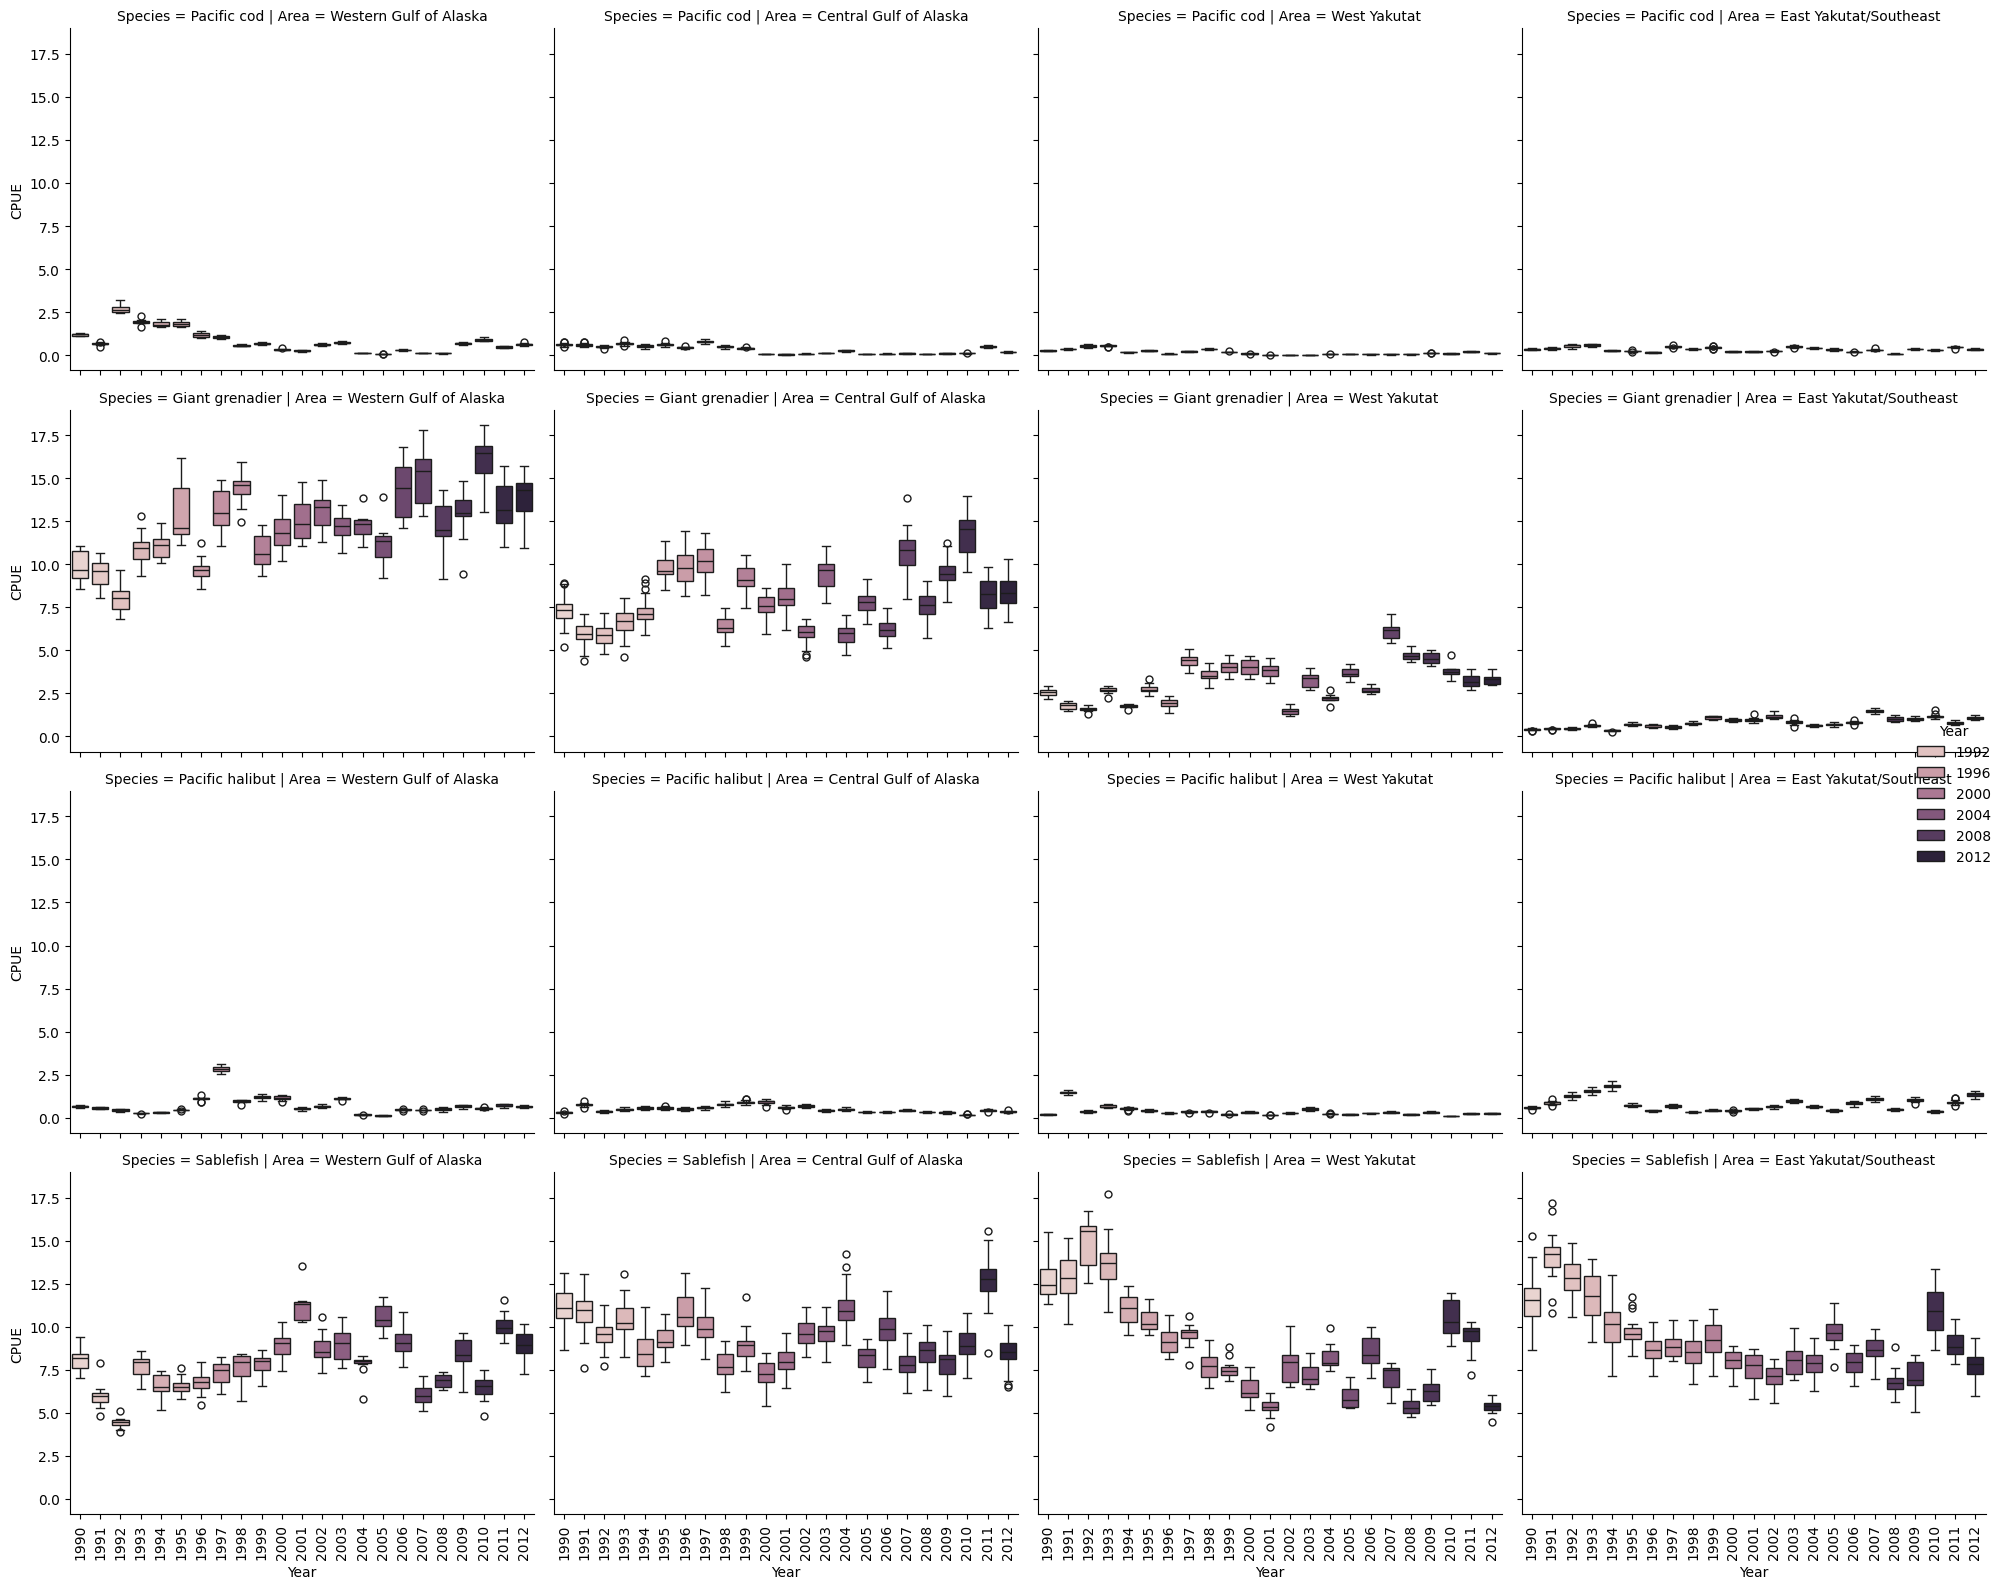

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the FacetGrid
g = sns.catplot(
    data=fish,
    x='Year',
    y='CPUE',
    hue='Year',
    col='Area',
    row='Species',
    kind='box',
    height=4,
    aspect=1.2
)

# Rotate x-axis labels
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

First, we note large variation in scale between fish species. Let's try to allow the scale to change by `Species`:

<ipython-input-24-6e4623b20290>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
<ipython-input-24-6e4623b20290>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
<ipython-input-24-6e4623b20290>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
<ipython-input-24-6e4623b20290>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


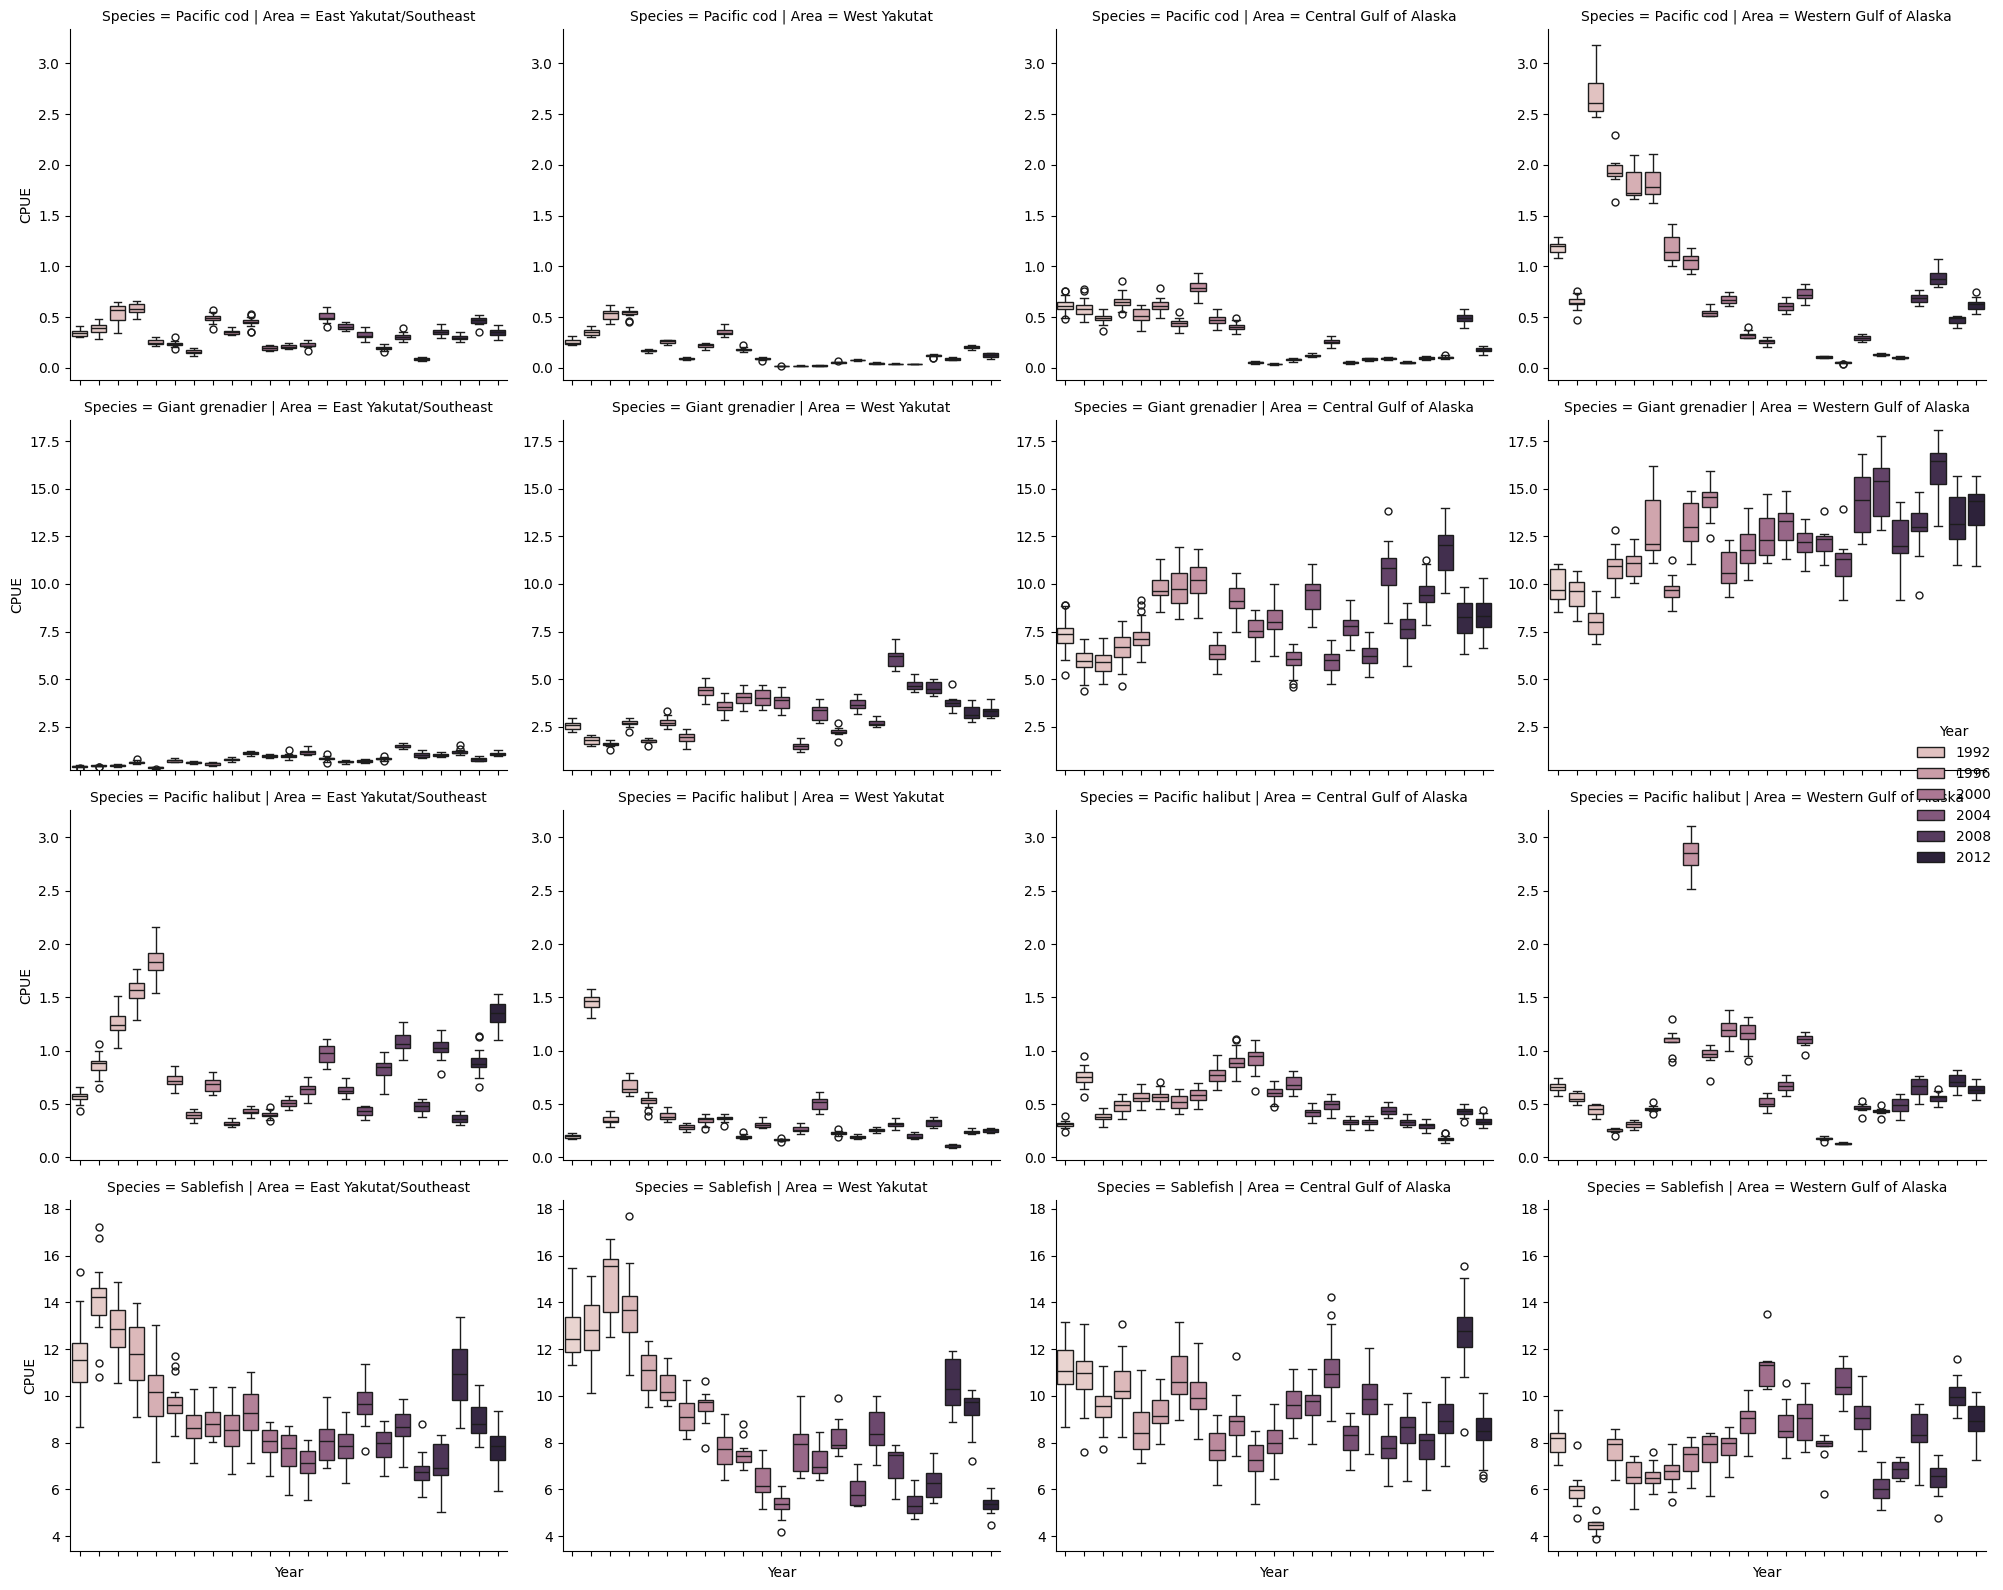

In [24]:
g = sns.catplot(
    data=fish,
    x='Year',
    y='CPUE',
    hue='Year',
    col='Area',
    col_order = ['East Yakutat/Southeast', 'West Yakutat', 'Central Gulf of Alaska', 'Western Gulf of Alaska'],
    row='Species',
    kind='box',
    height=4,
    aspect=1.2,
    sharey=False  # allow individual y-axis, we'll manually sync per row
)

# Get the species (row) levels
species_levels = fish['Species'].unique()

# Sync y-axis within each row
for i, species in enumerate(species_levels):
    # Get all axes in the current row
    axes_row = g.axes[i]
    # Find the min and max y across this row
    y_mins, y_maxs = zip(*(ax.get_ylim() for ax in axes_row))
    common_ylim = (min(y_mins), max(y_maxs))
    # Set the same ylim for all axes in this row
    for ax in axes_row:
        ax.set_ylim(common_ylim)

# Rotate x-axis labels
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

We now see CPUE oscillations overtime and between geogpraphical areas, but again this varies by fish species. What if we rescale CPUE?

In [25]:
# Define the rescale function
def rescale01(x):
    rng = (np.nanmin(x), np.nanmax(x))
    return 100 * (x - rng[0]) / (rng[1] - rng[0]) if rng[1] != rng[0] else np.zeros_like(x)

# Assuming 'fish' is a pandas DataFrame with columns: 'Species', 'CPUE'
# Group by 'Species' and apply the rescaling to each group

fish['rescaled_cpue'] = (
    fish.groupby('Species')['CPUE']
    .transform(rescale01)
)

In [30]:
fish.groupby('Species').agg({'rescaled_cpue':['min','max']})

rescaled_cpue       
                          min    max
Species                             
Giant grenadier           0.0  100.0
Pacific cod               0.0  100.0
Pacific halibut           0.0  100.0
Sablefish                 0.0  100.0

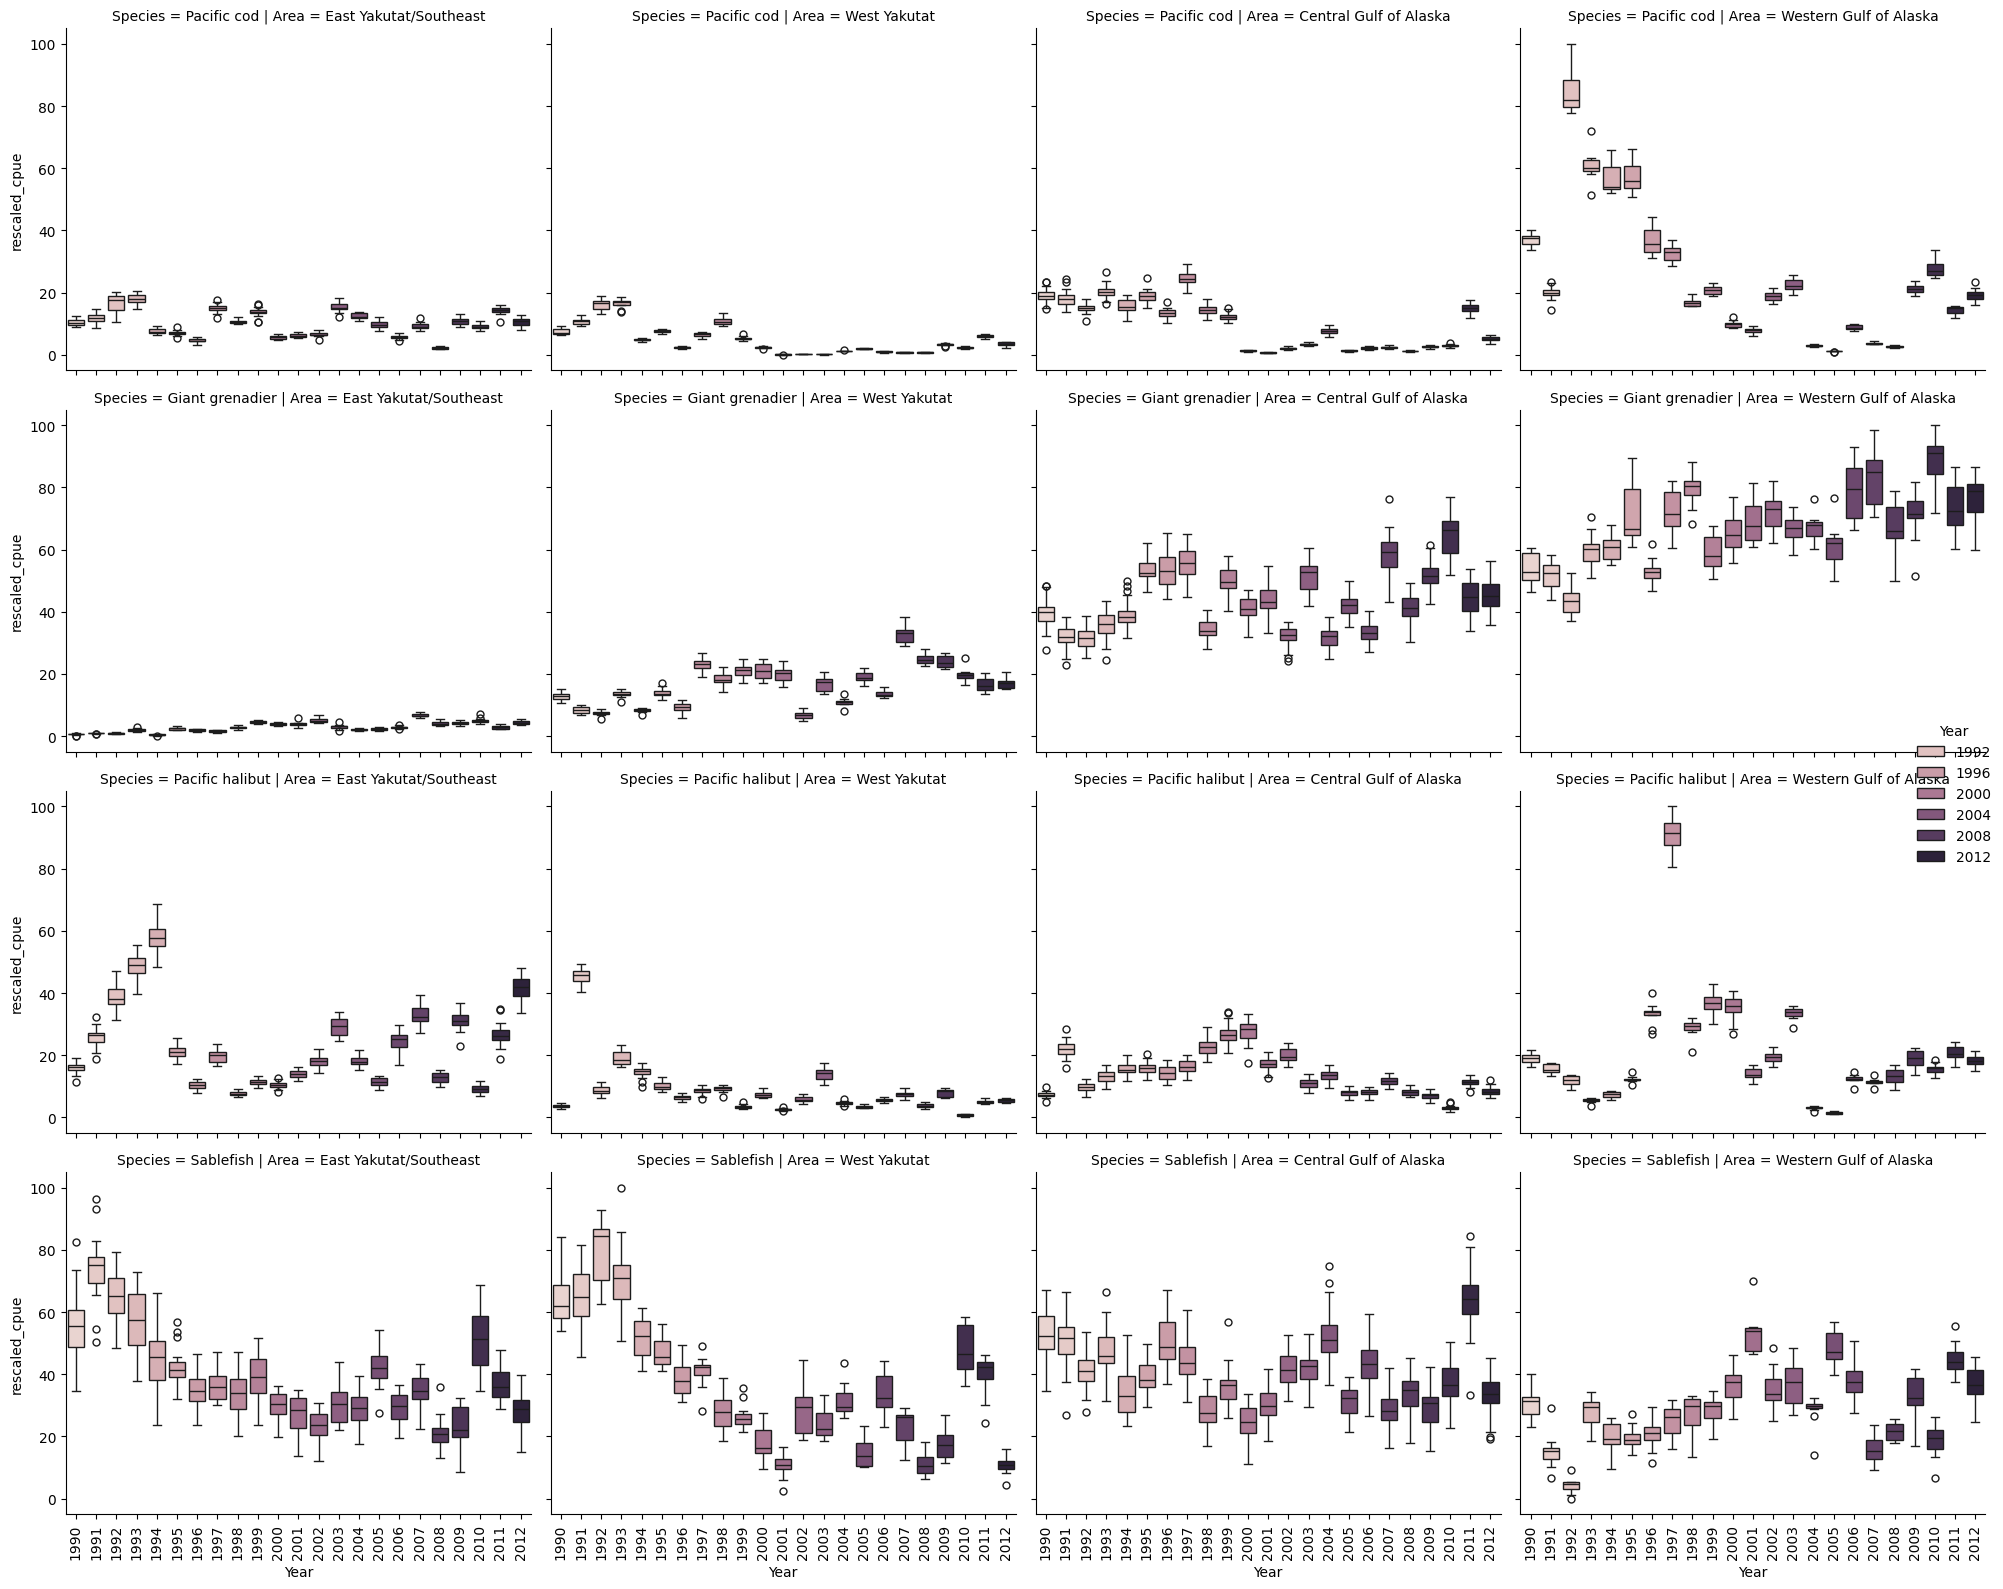

In [31]:
g = sns.catplot(
    data=fish,
    x='Year',
    y='rescaled_cpue',
    hue='Year',
    col='Area',
    col_order = ['East Yakutat/Southeast', 'West Yakutat', 'Central Gulf of Alaska', 'Western Gulf of Alaska'],
    row='Species',
    kind='box',
    height=4,
    aspect=1.2,
    sharey=True  # allow individual y-axis, we'll manually sync per row
)

# Rotate x-axis labels
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

### Trends

A trend is usually an average over time:

In [32]:
dd = (
    fish.groupby(['Species', 'Area', 'Year'])['rescaled_cpue']
    .mean()
    .round(2)
    .reset_index()
    .pivot(index=['Species', 'Area'], columns='Year', values='rescaled_cpue')
    .reset_index()  # Optional: flatten the multi-index
)

print(dd)

Year          Species                    Area   1990   1991   1992   1993  \
0     Giant grenadier  Central Gulf of Alaska  39.50  31.86  31.43  35.85   
1     Giant grenadier  East Yakutat/Southeast   0.67   0.91   0.95   1.96   
2     Giant grenadier            West Yakutat  12.76   8.37   7.34  13.54   
3     Giant grenadier  Western Gulf of Alaska  53.98  51.59  43.48  59.65   
4         Pacific cod  Central Gulf of Alaska  19.18  18.10  15.00  20.23   
5         Pacific cod  East Yakutat/Southeast  10.47  11.74  16.86  17.95   
6         Pacific cod            West Yakutat   7.61  10.76  16.26  16.55   
7         Pacific cod  Western Gulf of Alaska  37.14  19.83  84.55  60.81   
8     Pacific halibut  Central Gulf of Alaska   7.35  22.11   9.77  13.20   
9     Pacific halibut  East Yakutat/Southeast  16.03  25.87  39.12  48.40   
10    Pacific halibut            West Yakutat   3.63  45.69   8.86  19.08   
11    Pacific halibut  Western Gulf of Alaska  18.95  15.60  11.78   5.39   

In [33]:
temp = dd.melt(id_vars=['Species', 'Area'], var_name='Year', value_name='CPUE')

-   `group`: we have only one observation for group (Species, Area, Year), so we must specify the grouping variable, in this case `Area`
-   year is not a number now, and this is reflected in the x axis: no intervals, all values are plotted (so we can for example place them vertically and make them smaller, to avoid overlap)

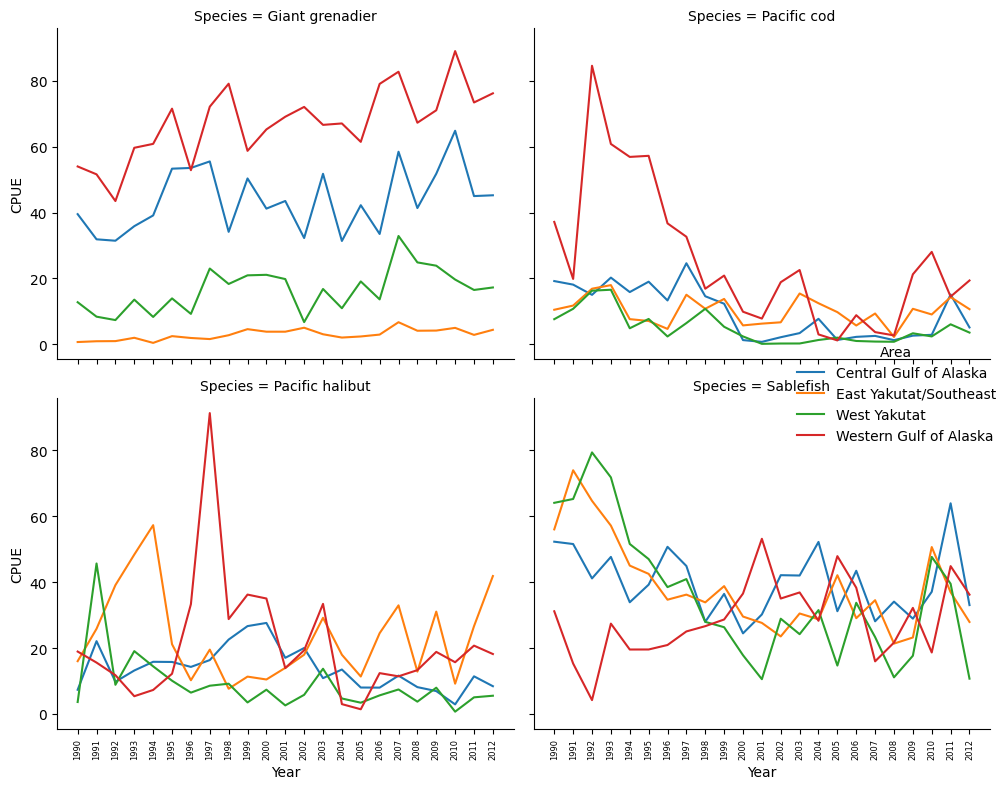

In [40]:
# Ensure 'Year' is treated as a string or categorical for proper x-axis handling
temp['Year'] = temp['Year'].astype(str)

# Set up FacetGrid: one subplot per Species
g = sns.FacetGrid(temp, col='Species', col_wrap=2, height=4, sharey=True,
                  legend_out=True)

# Add lineplot to each facet
g.map_dataframe(sns.lineplot, x='Year', y='CPUE', hue='Area', estimator=None)

# Rotate x-axis labels and adjust text size
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=90, labelsize=6)

# Add legend (optional customization)
g.add_legend(title='Area')
plt.tight_layout()
plt.show()

What if `Year` (x axis variable) was a number (an integer)?

In [41]:
temp['Year'] = temp['Year'].astype(int)

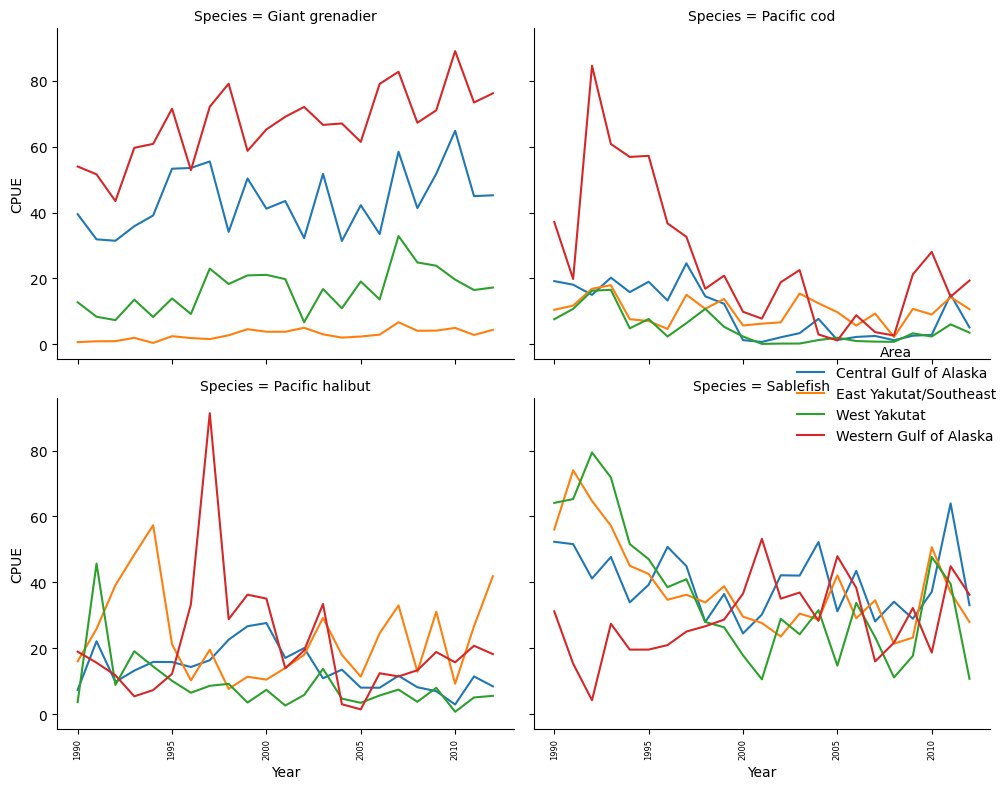

In [42]:
# Set up FacetGrid: one subplot per Species
g = sns.FacetGrid(temp, col='Species', col_wrap=2, height=4, sharey=True,
                  legend_out=True)

# Add lineplot to each facet
g.map_dataframe(sns.lineplot, x='Year', y='CPUE', hue='Area', estimator=None)

# Rotate x-axis labels and adjust text size
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=90, labelsize=6)

# Add legend (optional customization)
g.add_legend(title='Area')
plt.tight_layout()
plt.show()

------------------------------------------------------------------------

**Q: Do we have a trend?**

------------------------------------------------------------------------